In [1]:
#Cell_1.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
import re

In [2]:
#Cell_2.
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
#Cell_3.
csv_in = 'student-por-gp.csv'
df = pd.read_csv(csv_in, sep=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(423, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        423 non-null    int64 
 1   reason     423 non-null    object
 2   studytime  423 non-null    object
 3   failures   423 non-null    int64 
 4   schoolsup  423 non-null    int64 
 5   higher     423 non-null    int64 
 6   goout      423 non-null    int64 
 7   health     423 non-null    int64 
 8   absences   423 non-null    int64 
 9   G3         423 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 33.2+ KB
None


,age,reason,studytime,failures,schoolsup,higher,goout,health,absences,G3
0,18,course,2 to 5 hours,0,1,1,4,3,4,11
1,17,course,2 to 5 hours,0,0,1,3,3,2,11
2,15,other,2 to 5 hours,0,1,1,2,3,6,12
3,15,home,5 to 10 hours,0,0,1,2,5,0,14
4,16,home,2 to 5 hours,0,0,1,2,5,0,13


In [4]:
#Cell_4.
display(df.describe())
display(df.describe(exclude='number'))

,age,failures,schoolsup,higher,goout,health,absences,G3
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,16.666667,0.172577,0.132388,0.924350,3.146572,3.598109,4.215130,12.576832
std,1.244895,0.551607,0.339313,0.264751,1.152899,1.420632,5.191915,2.625636
min,15.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000,11.000000
50%,17.000000,0.000000,0.000000,1.000000,3.000000,4.000000,2.000000,13.000000
75%,18.000000,0.000000,0.000000,1.000000,4.000000,5.000000,6.000000,14.000000
max,22.000000,3.000000,1.000000,1.000000,5.000000,5.000000,32.000000,19.000000


,reason,studytime
count,423,423
unique,4,4
top,course,2 to 5 hours
freq,167,206


In [5]:
#Cell_5.
X = df.drop(columns='G3')  # explanatory variables, 2D
y = df['G3']  # objective variable, 1D
print('X:', X.shape)
display(X.head())
print('y:', y.shape)
print(y.head())

X: (423, 9)


,age,reason,studytime,failures,schoolsup,higher,goout,health,absences
0,18,course,2 to 5 hours,0,1,1,4,3,4
1,17,course,2 to 5 hours,0,0,1,3,3,2
2,15,other,2 to 5 hours,0,1,1,2,3,6
3,15,home,5 to 10 hours,0,0,1,2,5,0
4,16,home,2 to 5 hours,0,0,1,2,5,0


y: (423,)
0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64


In [6]:
#Cell_6.
print(X['studytime'].value_counts())

studytime
2 to 5 hours     206
<2 hours         119
5 to 10 hours     71
>10 hours         27
Name: count, dtype: int64


In [7]:
#Cell_7.
X['studytime'] = X['studytime'].replace(
    {'<2 hours':1, '2 to 5 hours':2,
     '5 to 10 hours':3, '>10 hours':4,
    }
)
display(X.head())

,age,reason,studytime,failures,schoolsup,higher,goout,health,absences
0,18,course,2,0,1,1,4,3,4
1,17,course,2,0,0,1,3,3,2
2,15,other,2,0,1,1,2,3,6
3,15,home,3,0,0,1,2,5,0
4,16,home,2,0,0,1,2,5,0


In [8]:
#Cell_8.
X_dumm = pd.get_dummies(X, drop_first=True, dtype='uint8')
print('X_dumm:', X_dumm.shape)
display(X_dumm.head())

X_dumm: (423, 11)


,age,studytime,failures,schoolsup,higher,goout,health,absences,reason_home,reason_other,reason_reputation
0,18,2,0,1,1,4,3,4,0,0,0
1,17,2,0,0,1,3,3,2,0,0,0
2,15,2,0,1,1,2,3,6,0,1,0
3,15,3,0,0,1,2,5,0,1,0,0
4,16,2,0,0,1,2,5,0,1,0,0


In [9]:
#Cell_9.
X_dumm_c = sm.add_constant(X_dumm)
model = sm.OLS(y, X_dumm_c)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     18.82
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           1.53e-30
Time:                        19:22:20   Log-Likelihood:                -921.75
No. Observations:                 423   AIC:                             1868.
Df Residuals:                     411   BIC:                             1916.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.6330      1.71

In [10]:
#Cell_10.
print('R2:', results.rsquared)
print('Adj R2:', results.rsquared_adj)

R2: 0.33500762976006815
Adj R2: 0.31720978043491177


In [11]:
#Cell_11.
print(results.params)

const                6.632959
age                  0.284534
studytime            0.330960
failures            -1.266708
schoolsup           -1.453179
higher               2.640919
goout               -0.257661
health              -0.191346
absences            -0.060924
reason_home          0.308610
reason_other         0.221979
reason_reputation    0.604262
dtype: float64


In [12]:
#Cell_12.
X_scaled_ar = scale(X_dumm)
y_scaled_ar = scale(y)

In [13]:
#Cell_13.
# NOTE: make DataFrames corresponding to X_scaled and y_scaled.
X_scaled = pd.DataFrame(X_scaled_ar, columns=X_dumm.columns)
y_scaled = pd.Series(y_scaled_ar, name=y.name)
model = sm.OLS(y_scaled, X_scaled)
results_scaled = model.fit()
print(results_scaled.summary())

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.335
Model:                            OLS   Adj. R-squared (uncentered):              0.317
Method:                 Least Squares   F-statistic:                              18.87
Date:                Tue, 16 Sep 2025   Prob (F-statistic):                    1.26e-30
Time:                        19:22:20   Log-Likelihood:                         -513.92
No. Observations:                 423   AIC:                                      1050.
Df Residuals:                     412   BIC:                                      1094.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [14]:
#Cell_14.
print(results_scaled.params.sort_values(key=np.abs, ascending=False))

higher               0.266292
failures            -0.266116
schoolsup           -0.187796
age                  0.134906
absences            -0.120470
goout               -0.113137
studytime            0.105909
health              -0.103530
reason_reputation    0.102234
reason_home          0.052357
reason_other         0.020691
dtype: float64


In [15]:
#Cell_15.
X_test = pd.DataFrame([[18, 4, 0, 0, 1, 3,
                        3, 0, 1, 0, 0],
                       [15, 1, 3, 1, 0, 1,
                        1, 10, 0, 1, 0],
                        ],
                        columns=X_dumm.columns)  # example
print('X for prediction:')
display(X_test)

X for prediction:


,age,studytime,failures,schoolsup,higher,goout,health,absences,reason_home,reason_other,reason_reputation
0,18,4,0,0,1,3,3,0,1,0,0
1,15,1,3,1,0,1,1,10,0,1,0


In [16]:
#Cell_16.
X_test_c = sm.add_constant(X_test, has_constant='add')
y_test = results.predict(X_test_c)
print('Predicted y:')
print(y_test)

Predicted y:
0    14.680912
1     5.142353
dtype: float64


In [17]:
#Cell_17.
y_pred = results.predict(X_dumm_c)
print('Predicted y:')
print(y_pred.head())

Predicted y:
0    11.755846
1    13.304000
2    11.517699
3    13.371322
4    13.324895
dtype: float64


In [18]:
#Cell_18.
y_min = np.append(y_pred, y).min()
y_max = np.append(y_pred, y).max()
y_margin = (y_max - y_min) * 0.1
y_min -= y_margin
y_max += y_margin

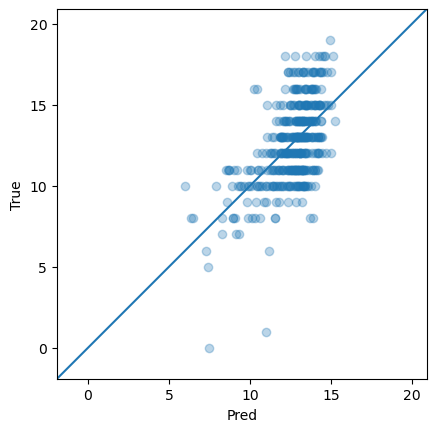

In [19]:
#Cell_19.
plt.scatter(y_pred, y, alpha=0.3)
plt.plot([y_min,y_max], [y_min,y_max])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(y_min, y_max)
plt.ylim(y_min, y_max)
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()

In [20]:
#Cell_20.
mse = mean_squared_error(y, y_pred)
print('MSE, RMSE:', mse, np.sqrt(mse))

MSE, RMSE: 4.573595787773046 2.138596686561785


# 以上がCS3の内容。ここから変数選択等を行う。

In [21]:
#Cell_21.
#標準化して変数選択
d_scaled=pd.concat([X_scaled,y_scaled],axis=1)
display(d_scaled.head())

,age,studytime,failures,schoolsup,higher,goout,health,absences,reason_home,reason_other,reason_reputation,G3
0,1.072309,-0.016902,-0.313233,2.559994,0.286079,0.741122,-0.421514,-0.041485,-0.611046,-0.261116,-0.607398,-0.601264
1,0.268077,-0.016902,-0.313233,-0.390626,0.286079,-0.127284,-0.421514,-0.427155,-0.611046,-0.261116,-0.607398,-0.601264
2,-1.340387,-0.016902,-0.313233,2.559994,0.286079,-0.995690,-0.421514,0.344186,-0.611046,3.829708,-0.607398,-0.219952
3,-1.340387,1.174681,-0.313233,-0.390626,0.286079,-0.995690,0.987977,-0.812826,1.636539,-0.261116,-0.607398,0.542670
4,-0.536155,-0.016902,-0.313233,-0.390626,0.286079,-0.995690,0.987977,-0.812826,1.636539,-0.261116,-0.607398,0.161359


In [22]:
#Cell_22.
# forward method for variable selection based on AIC.
# Stepwise feature selection method (forward); 変数増加法による変数選択
def step_aic_forward(model, exog, endog, **kwargs):
    '''
    This function calculates the best subset of explanatory (exogenous) variables based on AIC.
    Both exog and endog can be either str or list.

    Arguments:
        model: model from statsmodels.formula.api
        exog (str or list): explanatory (exogenous) variables
        endog (str or list): objective (endogenous) variables
        kwargs: additional keyword argments for model (data, family, ...)

    Return values:
        model: a model with the smallest AIC
    '''
    
    # Convert exog, endog into 1-d list
    exog = np.r_[[exog]].flatten()
    endog = np.r_[[endog]].flatten()
    remaining = set(exog)
    selected = []  # Selected exogenous variables

    # First, calculate AIC with a constant (no exogs)
    formula_head = 'Q("' + '") + Q("'.join(endog) + '") ~ '
    formula = formula_head + '1'
    aic = model(formula=formula, **kwargs).fit().aic
    print('AIC: {:.3f}, formula: {}'.format(aic, formula))

    current_score, best_new_score = aic, aic

    # Break loop if all exogs are selected or no remaining exogs can improve AIC
    while True:
        score_with_candidates = []
        for candidate in remaining:
            # Calculate AIC for adding an exog one by one
            formula_tail = 'Q("' + '") + Q("'.join(selected + [candidate]) + '")'
            formula = formula_head + formula_tail
            aic = model(formula=formula, **kwargs).fit().aic
            print('AIC: {:.3f}, formula: {}'.format(aic, formula))

            score_with_candidates.append((aic, candidate))

        # Select best_candidate with minimum AIC
        score_with_candidates.sort()
        best_score, best_candidate = score_with_candidates[0]

        # select best_candidate if AIC is improved
        improved = False
        if best_score < current_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_score
            improved = True
            
        if not remaining or not improved: break

    formula = formula_head + 'Q("' + '") + Q("'.join(selected) + '")'
    print('The best formula: {}'.format(formula))
    aic = model(formula=formula, **kwargs).fit().aic
    print('Minimum AIC: {:.3f}'.format(aic))
    
    ret = model(formula, **kwargs).fit()
    ret.model.exog_names_org = [re.sub(r'Q\(\"(.*)\"\)',r'\1',x) for x in list(ret.model.exog_names)]
    ret.model.endog_names_org = re.sub(r'Q\(\"(.*)\"\)',r'\1',ret.model.endog_names)
    return ret

In [23]:
#Cell_23.
#変数選択を実行

header_y = y_scaled.name
header_x = X_scaled.columns
model = step_aic_forward(smf.ols, header_x,header_y, data=d_scaled)

AIC: 1202.422, formula: Q("G3") ~ 1
AIC: 1138.472, formula: Q("G3") ~ Q("higher")
AIC: 1132.869, formula: Q("G3") ~ Q("failures")
AIC: 1196.150, formula: Q("G3") ~ Q("goout")
AIC: 1204.276, formula: Q("G3") ~ Q("age")
AIC: 1175.448, formula: Q("G3") ~ Q("studytime")
AIC: 1195.218, formula: Q("G3") ~ Q("health")
AIC: 1186.724, formula: Q("G3") ~ Q("absences")
AIC: 1191.058, formula: Q("G3") ~ Q("schoolsup")
AIC: 1193.875, formula: Q("G3") ~ Q("reason_reputation")
AIC: 1204.410, formula: Q("G3") ~ Q("reason_home")
AIC: 1203.999, formula: Q("G3") ~ Q("reason_other")
AIC: 1101.375, formula: Q("G3") ~ Q("failures") + Q("higher")
AIC: 1128.643, formula: Q("G3") ~ Q("failures") + Q("goout")
AIC: 1129.929, formula: Q("G3") ~ Q("failures") + Q("age")
AIC: 1117.897, formula: Q("G3") ~ Q("failures") + Q("studytime")
AIC: 1127.836, formula: Q("G3") ~ Q("failures") + Q("health")
AIC: 1125.127, formula: Q("G3") ~ Q("failures") + Q("absences")
AIC: 1120.190, formula: Q("G3") ~ Q("failures") + Q("scho

In [24]:
#Cell_24.
#選択された説明変数のみで標準化重回帰分析
#reasonなし
X_scaled2 = X_scaled[['failures', 'higher', 'schoolsup', 'studytime', 'health', 'goout', 'age', 'absences']]

import statsmodels.api as sm
mod2 = sm.OLS(y_scaled,X_scaled2)
res2 = mod2.fit()
print(res2.summary())

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.327
Model:                            OLS   Adj. R-squared (uncentered):              0.314
Method:                 Least Squares   F-statistic:                              25.19
Date:                Tue, 16 Sep 2025   Prob (F-statistic):                    1.20e-31
Time:                        19:22:21   Log-Likelihood:                         -516.51
No. Observations:                 423   AIC:                                      1049.
Df Residuals:                     415   BIC:                                      1081.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
#Cell_25.
#reason有りの場合。この場合は、もとのX_scaledそのもの。
X_scaled3 = X_scaled

import statsmodels.api as sm
mod3 = sm.OLS(y_scaled,X_scaled3)
res3 = mod3.fit()
print(res3.summary())

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.335
Model:                            OLS   Adj. R-squared (uncentered):              0.317
Method:                 Least Squares   F-statistic:                              18.87
Date:                Tue, 16 Sep 2025   Prob (F-statistic):                    1.26e-30
Time:                        19:22:21   Log-Likelihood:                         -513.92
No. Observations:                 423   AIC:                                      1050.
Df Residuals:                     412   BIC:                                      1094.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [26]:
#reasonなしの方がAICが小さかったので、こちらを採用。

In [27]:
#Cell_26.
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_cols = mod2.exog.shape[1] 
vifs = [variance_inflation_factor(mod2.exog, i)
        for i in range(0, num_cols)]
pd.DataFrame(vifs, index=mod2.exog_names, columns=["VIF"])

,VIF
failures,1.254969
higher,1.247009
schoolsup,1.046879
studytime,1.101442
health,1.014582
goout,1.032601
age,1.224821
absences,1.101689


In [28]:
#すべて10未満のため、多重共線性(マルチコ)は検出されなかった。

In [29]:
#Cell_27.
#標準化する前のデータフレームで重回帰分析。これが最終モデル。
X_final = X_dumm[['failures', 'higher', 'schoolsup', 'studytime', 'health', 'goout', 'age', 'absences']]

mod_final = sm.OLS(y, sm.add_constant(X_final))
res_final = mod_final.fit()
print(res_final.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     25.12
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           1.45e-31
Time:                        19:22:21   Log-Likelihood:                -924.34
No. Observations:                 423   AIC:                             1867.
Df Residuals:                     414   BIC:                             1903.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6875      1.703      3.928      0.0

In [30]:
#以下では、最終モデルについて、信頼区間、予測区間を算出。

In [31]:
#Cell_28.
#Variance-covariance matrix.
Sigma = np.asmatrix(X_final.cov())

In [32]:
#Cell_29.
def Mahala2(vec_x, vec_mean, mat):
    length = mat.shape[0]
    vec_x = np.array(vec_x, dtype='float64')
    vec = np.asmatrix((vec_x - vec_mean).values.reshape(length, 1))
    inv = np.linalg.inv(mat)
    mahala2 = vec.T.dot(inv.dot(vec))
    return mahala2[0, 0]

In [33]:
#Cell_30.
import scipy.stats as ss
n = len(X_final) # 標本数. Sample size.
dfm = res_final.df_model # 独立変数の数（モデルの自由度）．　Number of IVs (Model degrees of freedom). 
t_0025 = ss.t.isf(q=0.05/2, df=n-dfm-1) # 自由度 n-dfm-1のt分布の上側2.5パーセント点(= ss.t.ppf(q=0.975, df=n-dfm-1))
vec_mean = X_final.mean() # 独立変数の平均を求める　Find average of independent variables
print(vec_mean)

failures      0.172577
higher        0.924350
schoolsup     0.132388
studytime     2.014184
health        3.598109
goout         3.146572
age          16.666667
absences      4.215130
dtype: float64


In [34]:
#Cell_31.
display(X_final.head())

,failures,higher,schoolsup,studytime,health,goout,age,absences
0,0,1,1,2,3,4,18,4
1,0,1,0,2,3,3,17,2
2,0,1,1,2,3,2,15,6
3,0,1,0,3,5,2,15,0
4,0,1,0,2,5,2,16,0


In [35]:
#Cell_32.
#観測値に対応する従属変数の信頼区間を求める Find CI of Y on observed values
X = sm.add_constant(X_final).iloc[0,:] 
print(X)
hat_y=X.dot(res_final.params) # Xとresults.paramsの内積を求め従属変数の推定値を求める　Obtain estimated value of dependent variable
print(hat_y)

D2_0 = Mahala2(X_final.iloc[0,:], vec_mean, Sigma) # マハラノビス距離の二乗を求める Squared Mahalanobis distance

Ve = res_final.scale #  残差変動の不偏分散． A scale factor for the covariance matrix.
Se_o = np.sqrt((1/n + D2_0 / (n-1)) * Ve) #観測値の場合　In case of observed value

ci_low = hat_y - t_0025 * Se_o# 下側信頼
ci_up = hat_y + t_0025 * Se_o # 上側信頼

print("理論値（theoretical value）:", hat_y)
print("理論値の信頼区間（CI of theoretical value）：({0},{1})".format(ci_low,ci_up))

const         1.0
failures      0.0
higher        1.0
schoolsup     1.0
studytime     2.0
health        3.0
goout         4.0
age          18.0
absences      4.0
Name: 0, dtype: float64
12.067716539882126
理論値（theoretical value）: 12.067716539882126
理論値の信頼区間（CI of theoretical value）：(11.36100028588765,12.774432793876601)


In [36]:
#Cell_33.
#予測値（未観測値に対応する従属変数）の信頼区間を求める Find prediction interval of Y on unobserved values
X_test2 = X_test[['failures', 'higher', 'schoolsup', 'studytime', 'health', 'goout', 'age', 'absences']] #未観測値の設定
X = sm.add_constant(X_test2).iloc[0,:]
#print(X)
hat_y=X.dot(res_final.params) # Xとresults.paramsの内積を求め従属変数の推定値を求める　Obtain estimated value of dependent variable

D2_0 = Mahala2(X_test2.iloc[0,:], vec_mean, Sigma) # マハラノビス距離の二乗を求める Squared Mahalanobis distance
Se_p = np.sqrt((1 + 1/n + D2_0 / (n-1)) * Ve) #未観測値の場合　In case of unobserved value

pi_low = hat_y - t_0025 * Se_p# 下側信頼
pi_up = hat_y + t_0025 * Se_p # 上側信頼

print("予測値（Predicted value）:", hat_y)
print("予測値の信頼区間（CI of predicted value）：({0},{1})".format(pi_low,pi_up))

予測値（Predicted value）: 14.729138438227816
予測値の信頼区間（CI of predicted value）：(10.412008568576159,19.046268307879473)


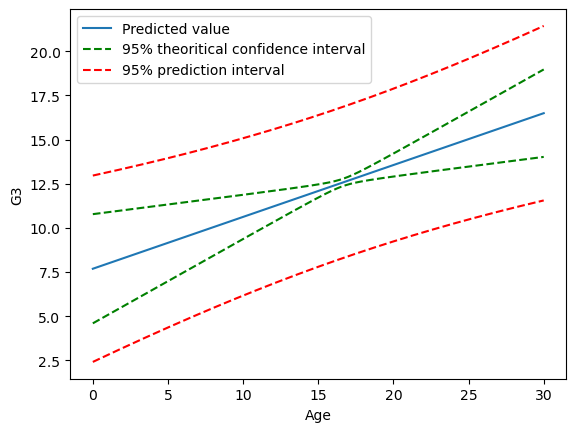

In [37]:
#Cell_34.
x_axis = np.linspace(0, 30, 2000) 

#従属変数の予測値が入る変数
hat_y = []
#age以外は、平均値で固定
(a1,a2,a3,a4,a5,a6,a7)=vec_mean[['failures','higher','schoolsup','studytime','health','goout','absences']]

for x in x_axis:
    X = np.array([1,a1,a2,a3,a4,a5,a6,x,a7])
    hat_y.append(X.dot(res_final.params))# Xとresults.paramsの内積を求め従属変数の推定値を求める Obtain estimated value of dependent variable
plt.plot(x_axis, hat_y, label="Predicted value") # 予測値をプロット

D2 = []
for x in x_axis:
    D2_0 = Mahala2([a1,a2,a3,a4,a5,a6,x,a7], vec_mean, Sigma) # マハラノビス距離の二乗を求める Squared Mahalanobis distance
    D2.append(D2_0)
D2 = np.array(D2)

Se_o = np.sqrt((1/n + D2 / (n-1)) * Ve) #観測値の場合　In case of observation value
Se_p = np.sqrt((1 + 1/n + D2 / (n-1)) * Ve) #未観測値の場合　In case of unobserved value

# 観測値に対応する従属変数の信頼区間をプロット
plt.plot(x_axis, hat_y - t_0025 * Se_o, "--g", label="95% theoritical confidence interval")
plt.plot(x_axis, hat_y + t_0025 * Se_o, "--g")

# 予測値の信頼区間をプロット
plt.plot(x_axis, hat_y - t_0025 * Se_p, "--r", label="95% prediction interval")
plt.plot(x_axis, hat_y + t_0025 * Se_p, "--r")

plt.xlabel("Age")
plt.ylabel("G3")
plt.legend()
plt.show()